In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# !wget -P data -nc 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [3]:
# !head data/CreditScoring.csv

In [4]:
df = pd.read_csv('data/CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [7]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [8]:
# map numerical codes to their real values. The real values were from the R code found under the same repo where the csv was download.
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)



In [9]:
# Describe the dataset. Similar to summarise() in R.
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
# Looks like we have some unusual max numbers. We need them to 'na' as they are really missing values.
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
# We have only one record where status is 'unk'. This is not useful for us. So delete the record.
df = df[df.status != 'unk'].reset_index()

In [13]:
# data is now clean. Now do the train, val, test split.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)
print(type(df_train))
df_train = df_train.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>


In [14]:
df_train

,index,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,951,default,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,688,default,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,2233,ok,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,3304,default,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,2271,ok,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,2382,ok,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,1784,ok,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,808,ok,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,1857,ok,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [15]:


df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

y_train = (df_train.status == 'default').astype('int')
y_val = (df_val.status == 'default').astype('int')
y_test = (df_test.status == 'default').astype('int')

del df_train['status']
del df_val['status']
del df_test['status']

In [16]:
del df_train['index']
del df_val['index']

In [17]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [19]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)  # training the model with feature matrix and target

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

# AUC for validation dataset is quite bad.

0.6541740330822697

In [20]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

# AUC for training dataset is very good. Why? This is due to Overfitting. Model is overfitted to the training data.
# This is because the tree depth if infinite so the training can resolve all the the branches and get to a precise target value.

1.0

In [21]:
# Let's try by limiting the tree depth to see if it can generalise the model.

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'val auc = {auc}')

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f'train auc = {auc}')


val auc = 0.7664957254607541
train auc = 0.8433781899611289


A tree with only one node it called a decision stump.

Let's see now to visualise the decision tree used by the model after the traning.

You will see the tree is built based on the actual values of the subset of records after each condition. A tree with about 5 node depth will show is much clearer.

In [22]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- income <= 50.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  50.50
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  132.50
|   |   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- seniority <= 12.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- seniority >  12.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   

/Users/kaushalya/.local/share/virtualenvs/lessons-8Dio02nN/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Decision Tree Learning Algorithm

## Decision Tree Parameter Tuning

Decision trees use many different parameters to decide when to split (node) and when to stop (leaf). Let's focus on two such parameters and how to tune them:
* `max_depth`
* `min_samples_leaf`

To see an exhausive list of parameters, see `DecisionTreeClassifier` pydoc.

In [23]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.750
  10 -> 0.702
  15 -> 0.667
  20 -> 0.646
None -> 0.657


In [24]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        # print('(%4s, %4s) -> %.3f' % (d, s, auc))

In [25]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.785319
21,6,10,0.778299
24,6,100,0.776434
23,6,20,0.773634
14,5,20,0.773537
13,5,15,0.772405
25,6,200,0.768267
11,5,5,0.767755
9,5,1,0.766496
10,5,2,0.766496


In [26]:
# It's a bit hard to read the above table so let's visualise this in a heatmap

# First pivot the data so columns represent max_depth and rows represent min_samples_leaf. The intersections are the auc scores.
df_scores_pivot = df_scores.pivot(
    index='min_samples_leaf',
    columns=['max_depth'],
    values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.748
2                 0.761  0.766  0.755
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

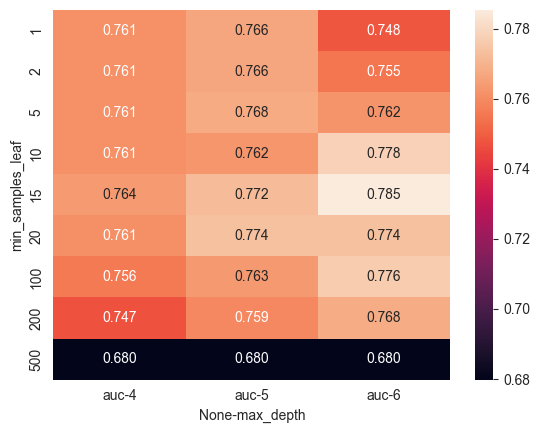

In [27]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [28]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False)


,max_depth,min_samples_leaf,auc
40,10.0,15,0.790817
67,NaN,15,0.787384
49,15.0,15,0.786485
58,20.0,15,0.785020
22,6.0,15,0.784856
...,...,...,...
26,6.0,500,0.679842
17,5.0,500,0.679842
45,15.0,1,0.657934
63,NaN,1,0.649315


<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

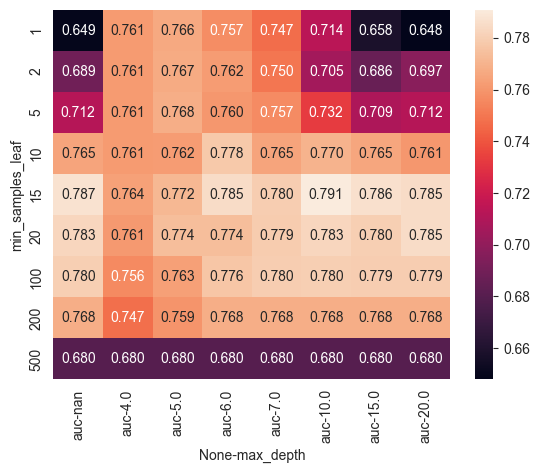

In [29]:
df_scores_pivot = df_scores.pivot(
    index='min_samples_leaf',
    columns=['max_depth'],
    values=['auc'])
df_scores_pivot.round(3)

sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')


In [30]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensemble Learning and Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# n_estimator is the number of decision trees in the forest
# random_state is similar to random seed. Fixes the reproducibility of the results. Otherwise, each time we train the forest, the resulting probability will be different for a given input.
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [33]:
y_pred = rf.predict_proba(X_val)[:, 1]
y_pred[:6]

array([0.1, 0. , 0.3, 0.1, 0.1, 0.4])

In [34]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [35]:
rf.predict_proba(X_val[[1]])

array([[1., 0.]])

Let's see how the number of trees in the forest can affect the final probability prediction.

In [51]:
scores = []
for n in range(10, 201, 20):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [53]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,30,0.815075
2,50,0.817082
3,70,0.817321
4,90,0.816824
5,110,0.817527
6,130,0.818253
7,150,0.817270
8,170,0.817606
9,190,0.817981


In [54]:
df_scores.auc

0    0.774473
1    0.815075
2    0.817082
3    0.817321
4    0.816824
5    0.817527
6    0.818253
7    0.817270
8    0.817606
9    0.817981
Name: auc, dtype: float64

Let's plot the performance of the model over then number of trees used.

As we can see the performance steadily increases till about 50 trees, then it plateaus. So 50 is the number of trees we should use for our model.

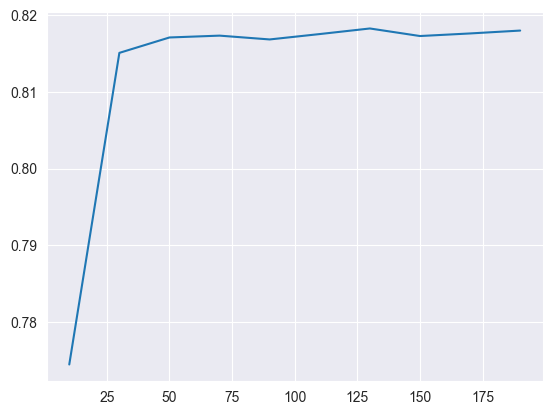

In [55]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Now let's repeat the same excercise with different depths to see how it changes the performance.

In [56]:
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, d, auc))


In [59]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'auc'])
df_scores

,n_estimators,max_depth,auc
0,10,5,0.787699
1,30,5,0.800305
2,50,5,0.799878
3,70,5,0.802251
4,90,5,0.803616
5,110,5,0.806626
6,130,5,0.808054
7,150,5,0.807219
8,170,5,0.806965
9,190,5,0.807231


Let's plot the auc scores on the same graph.

It shows that max depth 10 and 125 tress gives the best performance so far.

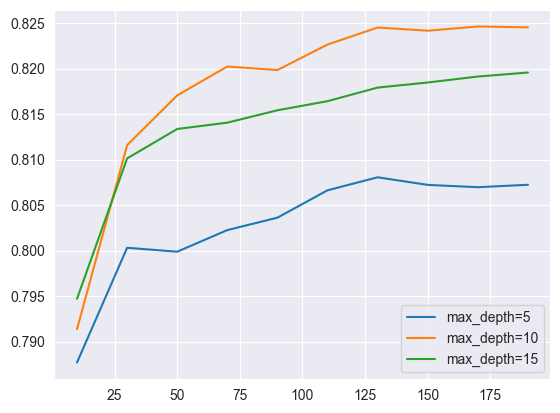

In [60]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')
plt.legend()

How let's bring min_samples_leaf parameter to the assessment.

In [63]:
max_depth = 10  # based on the above graph
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    min_samples_leaf=s,
                                    max_depth=max_depth,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, s, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'min_samples_leaf', 'auc'])
df_scores

,n_estimators,min_samples_leaf,auc
0,10,1,0.791365
1,20,1,0.808496
2,30,1,0.811584
3,40,1,0.817839
4,50,1,0.817058
...,...,...,...
95,160,50,0.805929
96,170,50,0.805172
97,180,50,0.805324
98,190,50,0.805596


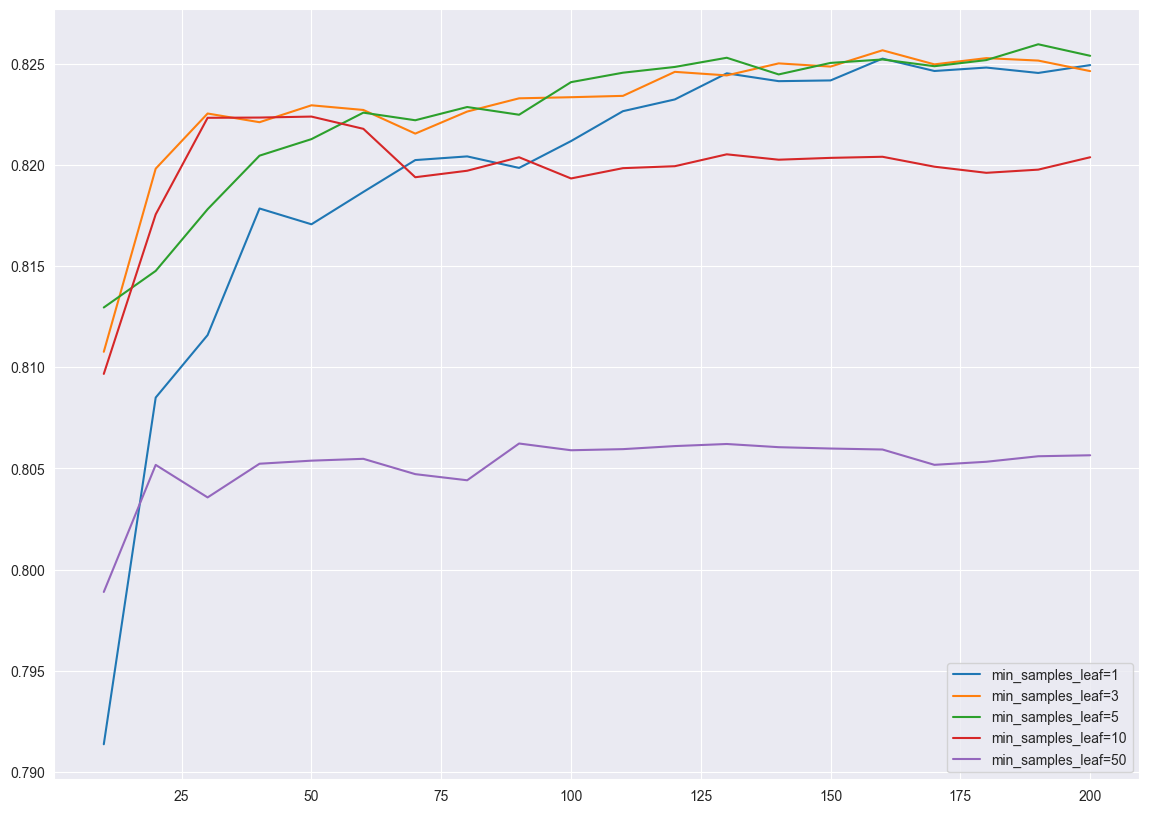

In [65]:
plt.figure(figsize=(14, 10))
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf={s}')
plt.legend()

**Cosmetic:** Assign specific colours to each plot

In [79]:
colours = ['purple', 'green', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
samples = zip(min_samples_leaf_values, colours)

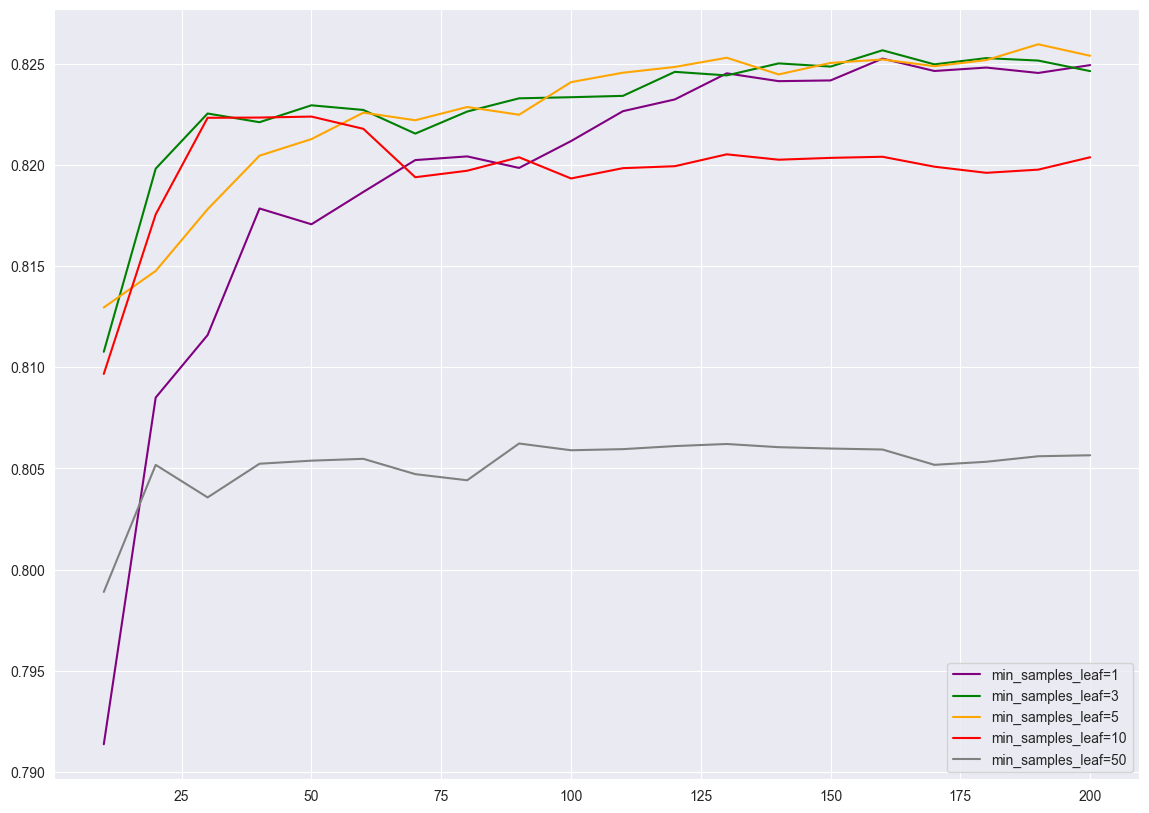

In [80]:
plt.figure(figsize=(14, 10))
for s, colour in samples:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf={s}', color=colour)
plt.legend()

According to the plot the top three (1, 3 and 5) are very close in terms of performance. We can go with min_samples_leaf=3. n_estimators=100 is a good choice too based on the plot.

In [82]:
min_samples_leaf = 3
n_estimators = 100

In [83]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

Other parameters worth looking at for tuning:
* max_features
* boostrap

*n_jobs* can be use to train the models in parallel much faster.

## Gradient Boosting and XGBoost

With Random Forest we come up with n number of *independent* models and combining them into a single model.

There's a sequential way to combine the models to derive a better model (i.e. each step corrects the errors in the model from the previous step). This is called boosting, particularly a type of boosting called gradient boosting, and for that we use a library called XGBoost.

In [84]:
import xgboost as xgb

In [85]:
features = dv.get_feature_names_out()
features

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [86]:
dm_train = xgb.DMatrix(X_train, label=y_train, feature_names=features)

In [87]:
dm_val = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
watchlist = [(dm_train, 'train'), (dm_val, 'val')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'eval_metric' : 'auc',
    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}


[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99998	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

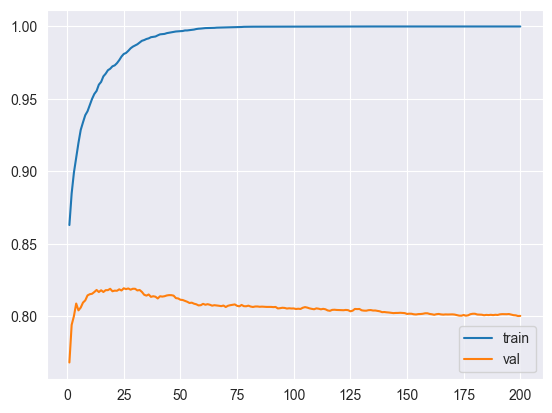

In [164]:
evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dm_train,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
df_scores = pd.DataFrame(list(zip(df_scores.index.values + 1, list(evals_result['train'].values())[0], list(evals_result['val'].values())[0])), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

In [93]:
y_pred = model.predict(dm_val)

In [94]:
roc_auc_score(y_val, y_pred)

0.8152745150274878